In [65]:
import json 
import csv 
  
  
# Opening JSON file and loading the data 
# into the variable data 
with open('Desktop/CloudTara/generated.json') as json_file: 
    data = json.load(json_file) 
  
company_data = data['financials'] 
  
# now we will open a file for writing 
data_file = open('data_file.csv', 'w') 
  
# create the csv writer object 
csv_writer = csv.writer(data_file) 
  
# Counter variable used for writing  
# headers to the CSV file 
count = 0
  
for i in company_data: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = i.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(i.values()) 
  
data_file.close()

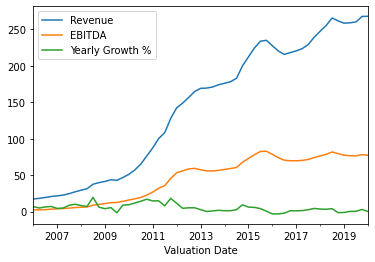

                Revenue  EBITDA  Yearly Growth %
Valuation Date                                  
2006-03-31        17.31    2.32         6.917851
2006-06-30        18.16    2.47         4.910456
2006-09-30        19.32    2.68         6.387665
2006-12-31        20.68    3.27         7.039337
2007-03-31        21.59    3.75         4.400387
2007-06-30        22.63    4.25         4.817045
2007-09-30        24.58    4.73         8.616880
2007-12-31        27.07    5.57        10.130187
2008-03-31        29.32    5.95         8.311784
2008-06-30        31.37    6.33         6.991814
2008-09-30        37.49    8.82        19.509085
2008-12-31        39.76    9.86         6.054948
2009-03-31        41.34   10.93         3.973843
2009-06-30        43.61   12.24         5.491050
2009-09-30        42.91   12.47        -1.605136
2009-12-31        46.71   14.14         8.855745
2010-03-31        51.12   15.83         9.441233
2010-06-30        57.09   17.52        11.678404
2010-09-30        65

In [83]:
from pandas import read_csv
#from pandas import datetime
import datetime
from matplotlib import pyplot
 
#def parser(x):
#	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('file1.csv', header=0,parse_dates=[0], index_col=0, squeeze=True)
series.plot()
pyplot.show()
print(series)

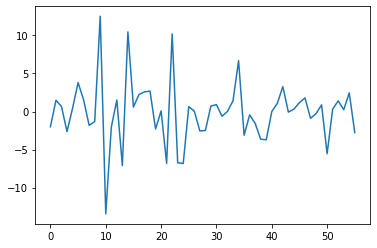

In [81]:
from pandas import read_csv
#from pandas import datetime
import datetime
from matplotlib import pyplot

series = read_csv('file1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series['Yearly Growth %'].values
diff = list()
for i in range(1, len(X)):
	value = (X[i] - X[i - 1])
	diff.append(value)
#print(diff)
pyplot.plot(diff)
pyplot.show()

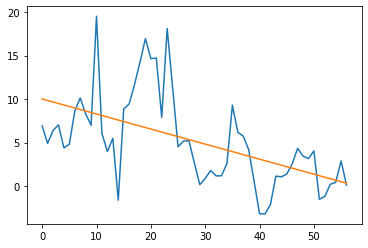

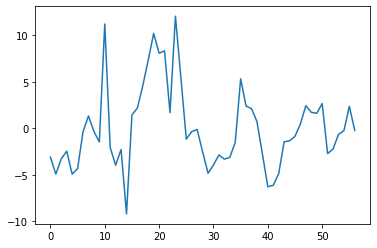

In [82]:
from pandas import read_csv
import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series['Yearly Growth %'].values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
#print(trend)
#print(y)
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
#print(detrended)
# plot detrended
pyplot.plot(detrended)
pyplot.show()